In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face 

# Компьютерное зрение

## Виды изображений
1. аналоговое изображение
2. фы

### Квантование - представление целыми числами вещественных яркостей
### Дискретизация - Преобразование аналоговой величины в дискретную
### Оцифровка - перевод изображения в цифровую форму в результате квантования и дискретизации

**Каждому пикселю может быть сопоставлено:**
1) Бинарное число
2) целое число
3) Три(четыре) числа
4) числа и время

### Окрестности пикселя:
    4 или 8 пикселей

### Найти количество дыр в изображении

In [93]:
image = np.load('ex1.npy')

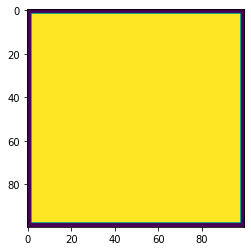

In [94]:
plt.figure()
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
print(f'кол-во дырок = {1}')

кол-во дырок = 1


In [57]:
external_masks = np.array([[[0, 0], [0, 1]],
                           [[0, 0], [1, 0]],
                           [[0, 1], [0, 0]],
                           [[1, 0], [0, 0]]])

inner_masks = np.logical_not(external_masks).astype('int')

joined_masks = np.array([[[1, 0], [0, 1]], [[0, 1], [1, 0]]])

In [58]:
def match(a: np.array, masks: np.array) -> bool:
    for mask in masks:
        if np.all(a == mask):
            return True
    return False

In [59]:
def count_objects(image: np.array) -> int:
    e = 0
    i = 0
    j = 0
    for y in range(0, image.shape[0] - 1):
        for x in range(0, image.shape[1] - 1):
            sub = image[y:y+2, x:x+2]
            if match(sub, external_masks):
                e += 1
            elif match(sub, inner_masks):
                i += 1
            if match(sub, joined_masks):
                j += 1
    return (e-i) // 4 + j // 2

In [10]:
print(count_objects(image))

1


In [11]:
image2 = np.load('ex2.npy')
print(count_objects(image2))

image3 = np.load('ex3.npy')
print(count_objects(image3))

image4 = np.load('ex4.npy')
print(count_objects(image4))

image5 = np.load('ex5.npy')
print(count_objects(image5))

1
1
3
64


In [12]:
image6 = np.load('ex6.npy')
print(count_objects(image6))

2


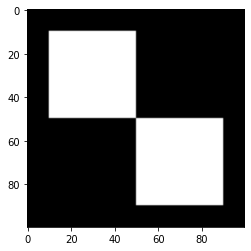

In [13]:
plt.figure()
plt.imshow(image6, cmap='gray')
plt.show()

# our program doesn't work because of 3-dim array

/tmp/ipykernel_6733/1298239895.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(a == mask):


0
(100, 100, 3)


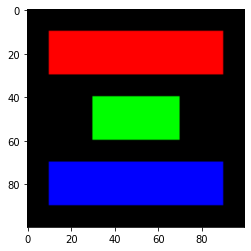

In [19]:
image7 = np.load('cex1.npy')
print(count_objects(image7))
print(image7.shape)

plt.figure()
plt.imshow(image7, cmap='gray')
plt.show()

/tmp/ipykernel_6733/1298239895.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(a == mask):


0
(100, 100, 3)


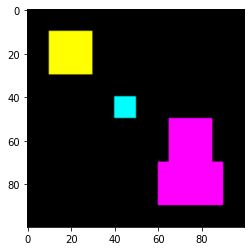

In [44]:
image8 = np.load('cex2.npy')
print(count_objects(image8))
print(image8.shape)

plt.figure()
plt.imshow(image8, cmap='gray')
plt.show()

## Can covert 3-dim array to 2-dim array

3
(100, 100)


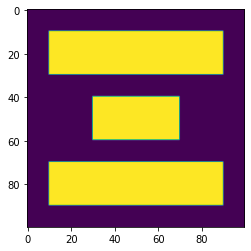

In [45]:
image7_1 = np.sum(image7, 2)

print(count_objects(image7_1))
print(image7_1.shape)

plt.figure()
plt.imshow(image7_1)
plt.show()

3
(100, 100)


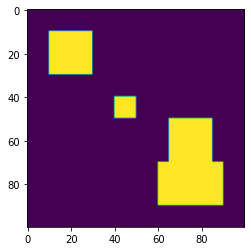

In [46]:
image8_1 = np.any(image8, 2)

print(count_objects(image8_1))
print(image8_1.shape)

plt.figure()
plt.imshow(image8_1)
plt.show()

#

## Marked image

### POV (поле зрения) -
### Номинальное разрешение - соотнесение реальных размеров изображения и его размеров на изображении
### Смешанный пиксель - накладывание двух объектов на один пиксель

# Маркировка связных компонент
### Все пикселы одного объекта являются связным компонентом, им присваивается одинаковая метка

In [4]:
image = np.zeros((20, 20), dtype='int32')

image[1:-1, -2] = 1

image[1, 1:5] = 1
image[1, 7:12] = 1
image[2, 1:3] = 1
image[2, 6:8] = 1
image[3:4, 1:7] = 1

image[7:11, 11] = 1
image[7:11, 14] = 1
image[10:15, 10:15] = 1

image[5:10, 5] = 1
image[5:10, 6] = 1

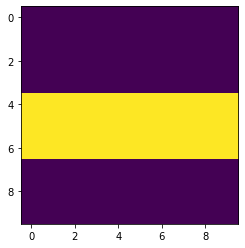

In [53]:
plt.imshow(image)

In [59]:
negated = image.copy() * (-1)

In [47]:
def label_image(image):
    label = 0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            px = image[y, x]
            if px == -1:
                label += 1
                search(image, label, y, x)
    return 


def search(image, label, y, x):
    image[y, x] = label
    for ny, nx in neighbours4(y, x):
        if 0 <= ny < image.shape[0] and 0 <= nx < image.shape[1]:
            if image[ny, nx] == -1:
                label += 1
                search(image, label, ny, nx)


def neighbours4(y, x):
    return (y, x-1), (y, x+1), (y-1, x), (y+1, x)


[[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [20. 19. 18. 17. 16. 15. 14. 13. 12. 11.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]]


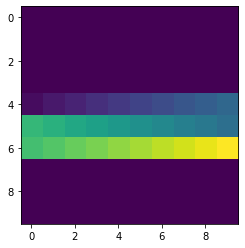

In [60]:
marked_img = negated.copy()
# plt.imshow(marked_img)
a = label_image(negated)
print(negated)
plt.imshow(negated)

## Построчный алгоритм

1. Взять пиксель объекта
2. Если есть соседи (left, right) с меткой - взять метку соседа, иначе создать новую метку
3. Пройтись второй раз, чтобы исправить метки у объектов

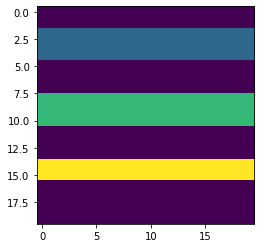

In [83]:
marked_img2 = negated.copy()
plt.imshow(two_pass_labeling(marked_img2))

## Морфология бинарных изображений

### Задача переноса изображения

In [31]:
def show_imgs(original, processed, figsize=(5, 5)):
    fig, subs = plt.subplots(1, 2)
    fig.figsize = figsize
    subs[0].imshow(original)
    subs[0].title.set_text("Original image")
    subs[1].imshow(processed)
    subs[1].title.set_text("Processed image")
    plt.show()

In [14]:
def translation(B, vector):
    translated = np.zeros_like(B)
    for y in range(translated.shape[0]):
        for x in range(translated.shape[1]):
            new_y = y + vector[0]
            new_x = x + vector[1]
            if new_x < 0 or new_y < 0 or new_y >= B.shape[0] or new_x >= B.shape[1]:
                continue
            
            translated[new_y, new_x] = B[y, x]
            
            
    return translated

In [27]:
image = face()
translated = translation(image, (50, 50))

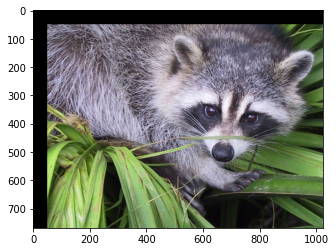

In [28]:
plt.imshow(translated)
plt.show()

### Наращивание 

In [29]:
arr = np.array([[0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,1,1,1,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,1,1,1,1,1,0,0],
                [0,0,0,0,1,1,1,1,0,0],
                [0,0,0,1,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0]])

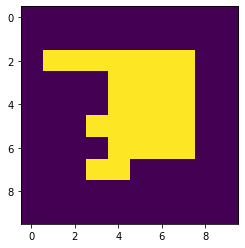

In [30]:
plt.imshow(arr)
plt.show()

In [15]:
def dilation(arr, mask=np.ones((3, 3))):
    result = np.zeros_like(arr)
    for y in range(1, arr.shape[0] - 1):
        for x in range(1, arr.shape[1] - 1):
            if arr[y, x] != 0:
                r = np.logical_or(arr[y - 1: y+2, x - 1: x+2], mask)
                result[y-1:y+2, x-1:x+2] = r
    return result

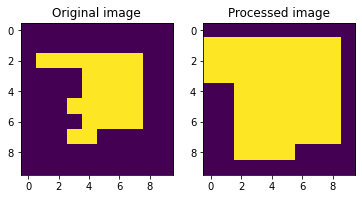

In [32]:
cross_mask = np.ones((3, 3))
cross_mask[0,0] = cross_mask[-1, -1] = cross_mask[-1, 0] = cross_mask[0, -1] = 0
# res = dilation(arr, cross_mask)
res = dilation(arr)

show_imgs(arr, res)

### Операция эрозии

In [16]:
def erosion(arr, mask=np.ones((3, 3))):
    result = np.zeros_like(arr)
    for y in range(1, arr.shape[0] - 1):
        for x in range(1, arr.shape[1] - 1):
            if arr[y, x] != 0:
                r = arr[y-1:y+2, x-1:x+2]
                if np.all(r == mask):
                    result[y, x] = 1
    return result

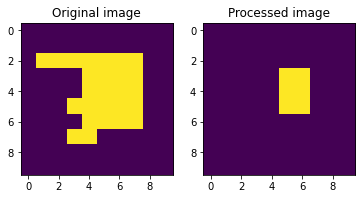

In [34]:
res = erosion(arr)
# res = erosion(arr, cross_mask)

show_imgs(arr, res)

In [17]:
def closing(arr, mask=np.ones((3, 3))):
    return erosion(dilation(arr, mask), mask)

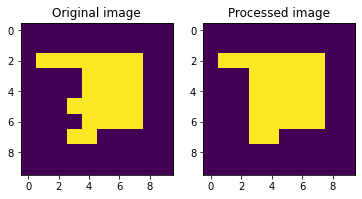

In [36]:
res = closing(arr)
# res = closing(arr, cross_mask)

show_imgs(arr, res)

In [18]:
def opening(arr, mask=np.ones((3, 3))):
    return dilation(erosion(arr, mask), mask)

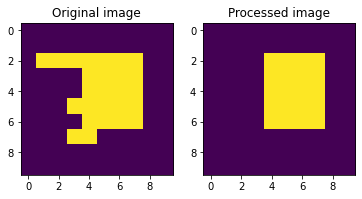

In [38]:
res = opening(arr)
# res = opening(arr, cross_mask)

show_imgs(arr, res)

In [39]:
image = np.load('wires/wires1.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'wires/wires1.npy'

In [ ]:
def neighbours4(y, x):
    return (y, x-1), (y, x+1), (y-1, x), (y+1, x)

def search(image, label,  y, x):           
    image[y, x] = label
    for ny, nx in neighbours4(y, x):
        if image[ny, nx] == -1:
            label += 1
            search(image, label, ny, nx)

def mark_pixels(image): 
    label = 0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if image[y, x] == -1:
                label += 1
                search(image, label, y, x)

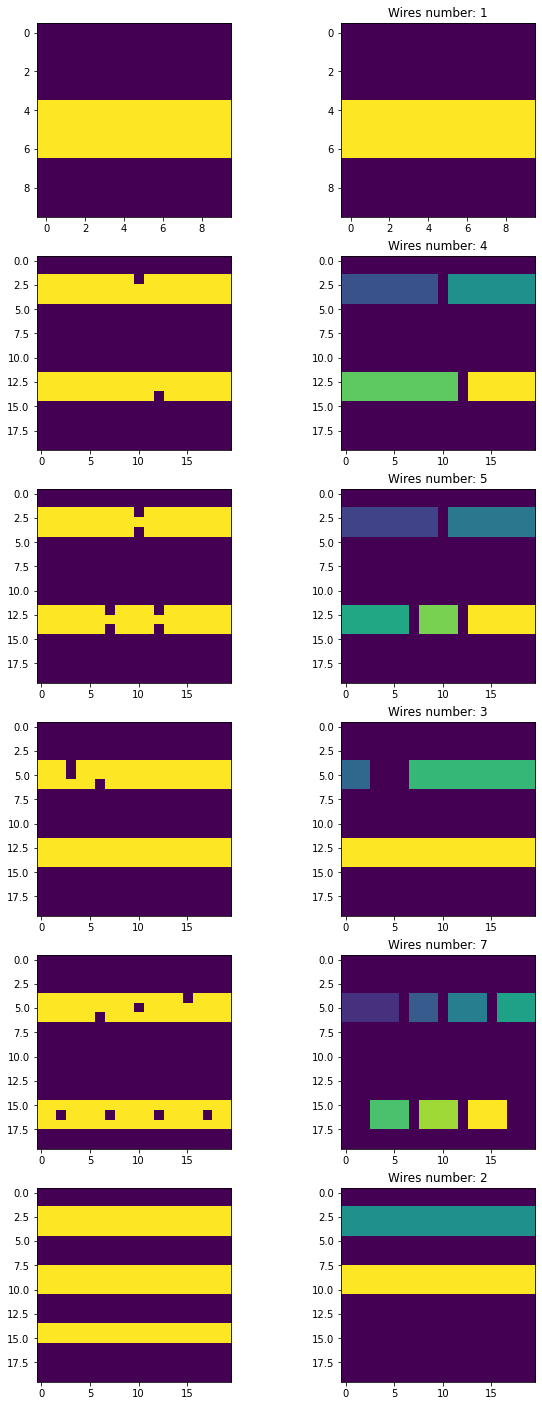

In [95]:
fig, subs = plt.subplots(6, 2, figsize=(10, 25))

for i in range(1, 7):
    image = np.load(f'../wires/wires{i}.npy')
    o_image = opening(image)

    negated = o_image.copy() * -1
    label_image(negated)
    marked = negated.copy()
    labeled = two_pass_labeling(marked)
    
    subs[i-1][0].imshow(image)    
    subs[i-1][1].imshow(labeled)
    
    subs[i-1][1].title.set_text(f"Wires number: {int(labeled.max())}")

## 23-10-2021

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology

In [24]:
stars = np.load('stars.npy').astype('uint8')

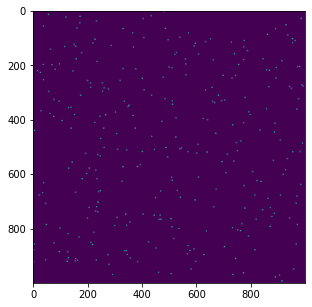

In [25]:
plt.figure(figsize=(5, 5))
plt.imshow(stars);

In [23]:
struct_plus = np.array([[0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0],
                        [1, 1, 1, 1, 1],
                        [0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0]])

In [44]:
result = morphology.binary_opening(stars, struct_plus)
# result = morphology.binary_closing(result, struct)

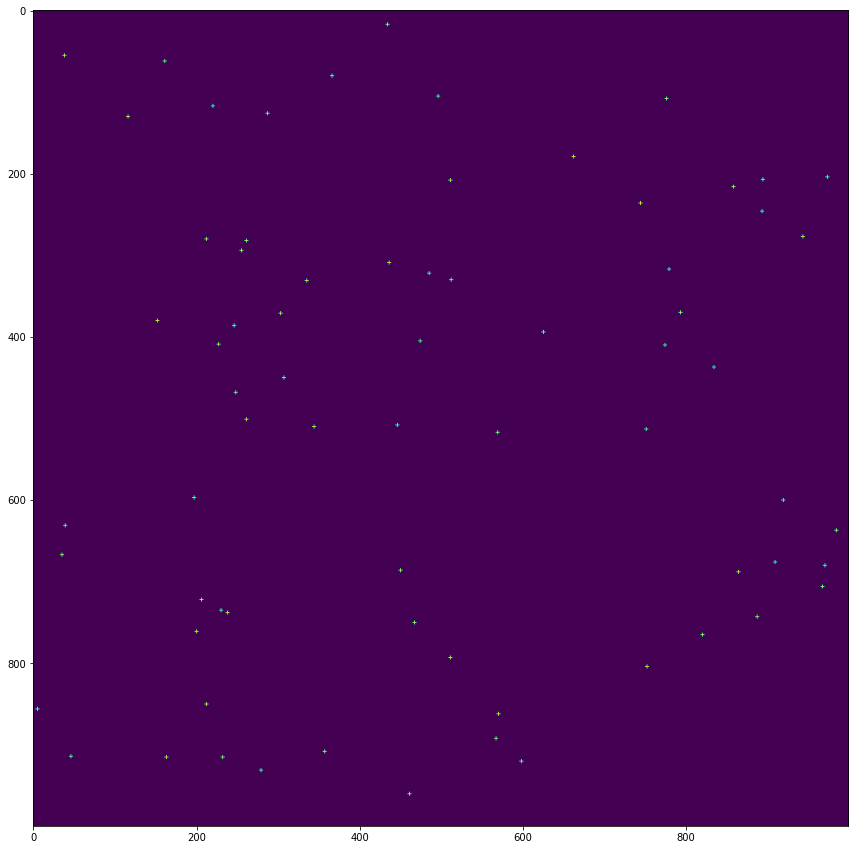

In [45]:
plt.figure(figsize=(15, 15))
plt.imshow(result);

In [58]:
def check(image, y, x):
    if not 0 <= x < image.shape[1]:
        return False
    if not 0 <= y < image.shape[0]:
        return False
    if image[y,x] !=0:
        return True
    return False

def neighbours2(image,y,x):
    left = y, x-1
    top = y-1,x

    if not check(image, *left):
        left = None
    if not check(image, *top):
        top = None

    return left,top

def find(label,linked):
    j = int(label)
    while linked[j] != 0:
        j = linked[j]
    return j

def union(label1,label2,linked):
    j = find(label1,linked)
    k = find(label2,linked)
    if j != k:
        linked[k] = j
    


def two_pass_labeling(b_image):
    labeled = np.zeros_like(b_image)
    label = 1
    linked = np.zeros(len(b_image), dtype='uint')

    for y in range(b_image.shape[0]):
        for x in range(b_image.shape[1]):
            if b_image[y,x] != 0:
                ns = neighbours2(b_image,y,x)
                if ns[0] is None and ns[1] is None:
                    m = label
                    label += 1
                else:
                    lbs = [labeled[i] for i in ns if i is not None]
                    m = min(lbs)
                labeled[y,x] = m

                for n in ns:
                    if n is not None:
                        lb = labeled[n]
                        if lb != m:
                            union(m, lb, linked)

    labs = []
    
    for y in range(b_image.shape[0]):
        for x in range(b_image.shape[1]):
            if b_image[y,x] != 0:
                new_label = find(labeled[y,x],linked)
                
                if new_label != labeled[y,x]:
                    labeled[y,x] = new_label                    
                if new_label not in labs:
                    labs.append(new_label)
                if labeled[y,x] in labs:
                    labeled[y,x] = labs.index(new_label) + 1

    return labeled

In [59]:
negated = result.copy() * -1
label_image(negated)
marked = negated.copy()
labeled = two_pass_labeling(marked)

In [61]:
labeled.max()

71

In [64]:
cross_mask = np.array([
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1],
])

square_mask = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
])

result_cross = morphology.binary_opening(stars, cross_mask)

negated = result_cross.copy() * -1
label_image(negated)
marked = negated.copy()
labeled = two_pass_labeling(marked)
labeled.max()

810

## Свойства объектов